# UCCSD ansatz, L-BFGS-B optimizer, Jordan-Wigner mapping, Aer simulator

    \item circuit depth,
    \item gate fidelity,
    \item parameter count,
    \item TRAINABILITY,
    \item EXPRESSIBILITY.

    $H_2$, $He$, $LiH$, $BeH_2$ molecules.

In [12]:
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit.primitives import StatevectorEstimator
import numpy as np
from matplotlib import pyplot as plt
import time

In [ ]:
molecules = [
    ("H2", lambda d: f"H .0 .0 .0; H .0 .0 {d}"),
    ("He", "He .0 .0 .0"),
    ("LiH", lambda d: f"Li .0 .0 .0; H .0 .0 {d}"),
    ("BeH2", lambda d: f"Be .0 .0 .0; H .0 .0 {d}; H .0 .0 {-d}"),
]

# for name, geom_fn in molecules:
#     geom = geom_fn(0.735)

## $H_2$


In [13]:
distances=[0.1, 0.2, 0.5, 0.735, 1.0, 1.5, 2.0, 3.0, 4.0]
iterations = [[] for _ in range(len(distances))]
runtimes=[]
energies=[]

fci_runtimes=[]
fci_energies=[]

In [14]:
from lib.hamiltonian_builder import make_jw_and_uccsd_h2

optimizer = L_BFGS_B(tol=1e-5)
estimator = StatevectorEstimator()

for i in range(len(distances)):
    (qubit_hamiltonian, ansatz) = make_jw_and_uccsd_h2(distances[i])
    def estimate_energy(parameters):
        job = estimator.run(
            [(ansatz, qubit_hamiltonian, parameters)]
        )
        result = job.result()[0].data.evs
        iterations[i].append(result)
        return result

    initial_point = np.zeros(ansatz.num_parameters)
    start = time.perf_counter()
    result = optimizer.minimize(fun=estimate_energy, x0=initial_point)
    end = time.perf_counter()
    runtimes.append(end - start)
    energies.append(result.fun)

In [15]:
# FCI
from lib.fci_utils import get_fci_h2

for i in range(len(distances)):
    start = time.perf_counter()
    fci_energy = get_fci_h2(distances[i])
    end = time.perf_counter()
    fci_runtimes.append(end - start)
    fci_energies.append(fci_energy)

converged SCF energy = 2.71588739329275
converged SCF energy = 0.164175012061695
converged SCF energy = -1.04299627454009
converged SCF energy = -1.116998996754
converged SCF energy = -1.06610864931794
converged SCF energy = -0.910873554594387
converged SCF energy = -0.783792654277353
converged SCF energy = -0.656048251145591
converged SCF energy = -0.614869974042561


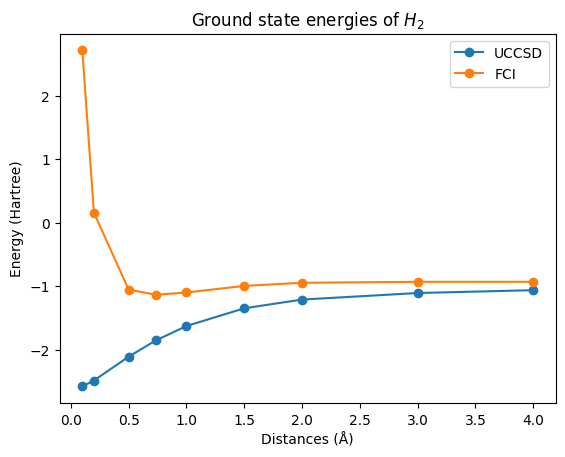

In [16]:
plt.plot(distances, energies, marker='o', linestyle='-', label="UCCSD")
plt.plot(distances, fci_energies, marker='o', linestyle='-', label="FCI")
plt.legend()
plt.xlabel('Distances (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Ground state energies of $H_2$')
plt.show()

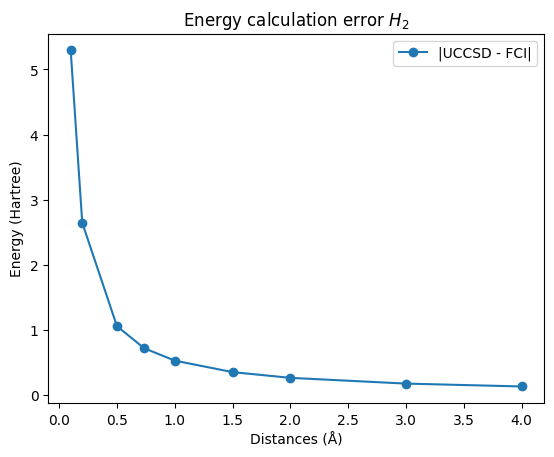

In [17]:
plt.plot(distances, [abs(e - f) for e, f in zip(energies, fci_energies)], marker='o', linestyle='-', label="|UCCSD - FCI|")
plt.legend()
plt.xlabel('Distances (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy calculation error $H_2$')
plt.show()

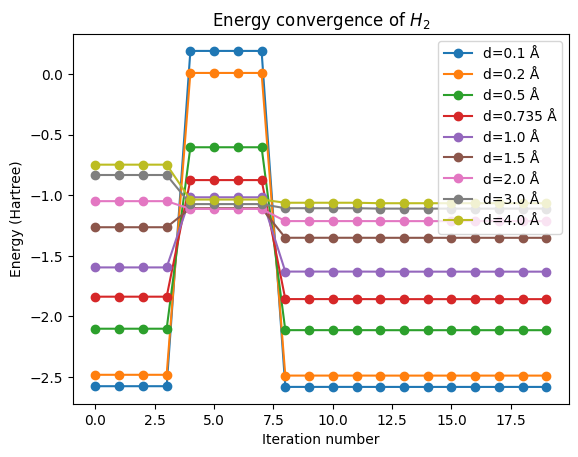

In [18]:
for i in range(len(distances)):
    plt.plot(range(len(iterations[i])), iterations[i], marker='o', linestyle='-', label=f'd={distances[i]} Å')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Energy (Hartree)')
plt.title('Energy convergence of $H_2$')
plt.show()

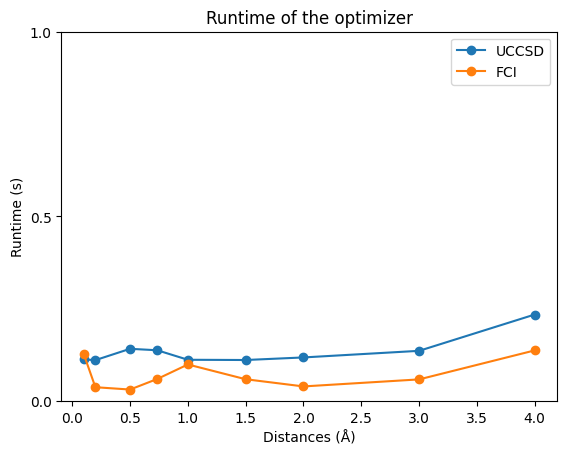

In [19]:
plt.plot(distances, runtimes, marker='o', linestyle='-', label="UCCSD")
plt.plot(distances, fci_runtimes, marker='o', linestyle='-', label="FCI")
plt.legend()
plt.xlabel('Distances (Å)')
plt.yticks(np.arange(0, max(runtimes) + 1, 0.5))
plt.ylabel('Runtime (s)')
plt.title('Runtime of the optimizer')
plt.show()

## $LiH$

In [20]:
lih_distances=[0.1, 0.2, 0.5, 0.735, 1.0, 1.5, 2.0, 3.0, 4.0]
lih_iterations = [[] for _ in range(len(lih_distances))]
lih_runtimes=[]
lih_energies=[]

lih_fci_runtimes=[]
lih_fci_energies=[]

In [21]:
from lib.hamiltonian_builder import make_jw_and_uccsd_lih
optimizer = L_BFGS_B(tol=1e-5)
estimator = StatevectorEstimator()

for i in range(len(lih_distances)):
    (qubit_hamiltonian, ansatz) = make_jw_and_uccsd_lih(lih_distances[i])
    def estimate_energy(parameters):
        job = estimator.run(
            [(ansatz, qubit_hamiltonian, parameters)]
        )
        result = job.result()[0].data.evs
        lih_iterations[i].append(result)
        return result

    initial_point = np.zeros(ansatz.num_parameters)
    start = time.perf_counter()
    result = optimizer.minimize(fun=estimate_energy, x0=initial_point)
    end = time.perf_counter()
    lih_runtimes.append(end - start)
    lih_energies.append(result.fun)

KeyboardInterrupt: 

In [22]:
# FCI
from lib.fci_utils import get_fci_lih

for i in range(len(lih_distances)):
    start = time.perf_counter()
    fci_energy = get_fci_lih(lih_distances[i])
    end = time.perf_counter()
    lih_fci_runtimes.append(end - start)
    lih_fci_energies.append(fci_energy)

converged SCF energy = 2.80287805218653
converged SCF energy = -3.99984448728018
converged SCF energy = -7.02841009454193
converged SCF energy = -7.53681349404237
converged SCF energy = -7.76736213574857
converged SCF energy = -7.86335762153512
converged SCF energy = -7.83090558463708
converged SCF energy = -7.71082990021723
converged SCF energy = -7.62497563013133


ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

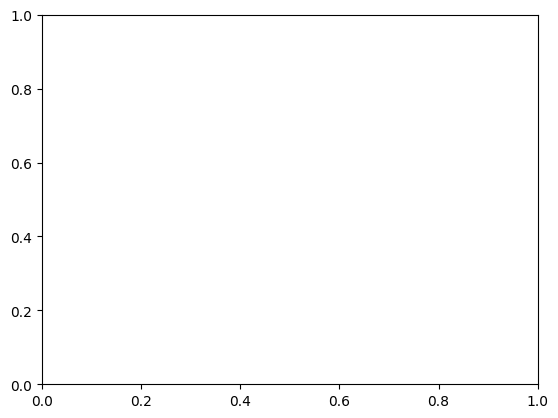

In [23]:
plt.plot(lih_distances, lih_energies, marker='o', linestyle='-', label="UCCSD")
plt.plot(lih_distances, lih_fci_energies, marker='o', linestyle='-', label="FCI")
plt.legend()
plt.xlabel('Distances (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Ground state energies of $LiH$')
plt.show()

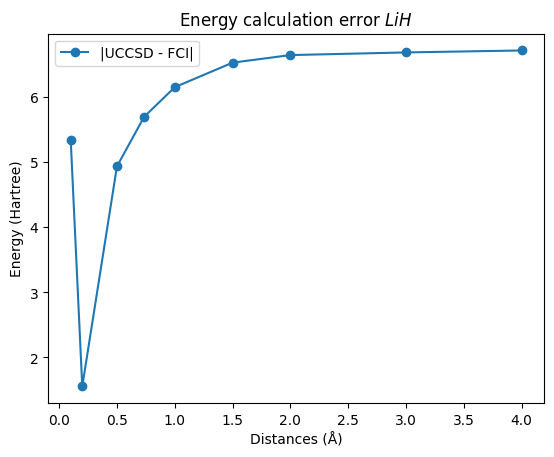

In [ ]:
plt.plot(lih_distances, [abs(e - f) for e, f in zip(lih_energies, lih_fci_energies)], marker='o', linestyle='-', label="|UCCSD - FCI|")
plt.legend()
plt.xlabel('Distances (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy calculation error $LiH$')
plt.show()

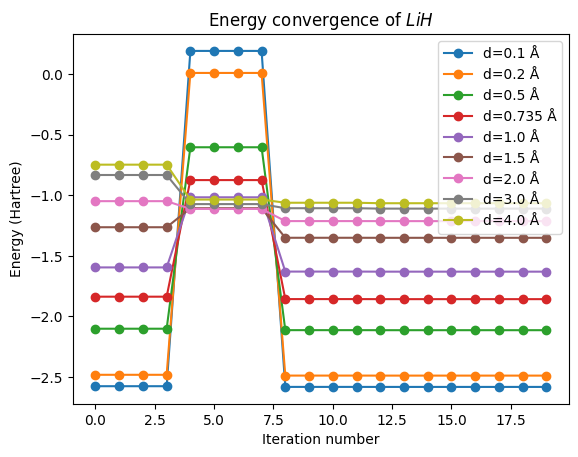

In [ ]:
for i in range(len(lih_distances)):
    plt.plot(range(len(lih_iterations[i])), lih_iterations[i], marker='o', linestyle='-', label=f'd={lih_distances[i]} Å')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Energy (Hartree)')
plt.title('Energy convergence of $LiH$')
plt.show()

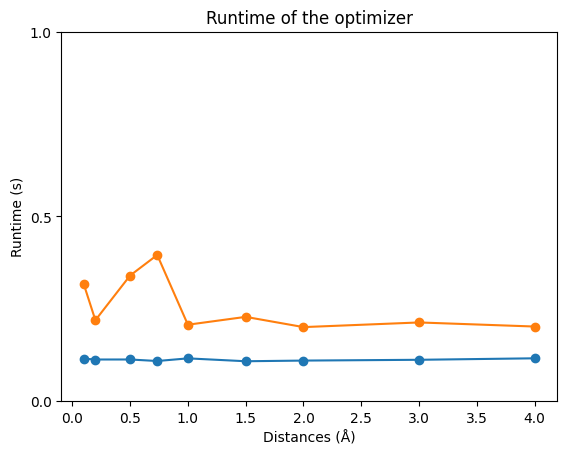

In [ ]:
plt.plot(lih_distances, lih_runtimes, marker='o', linestyle='-', label="UCCSD")
plt.plot(lih_distances, lih_fci_runtimes, marker='o', linestyle='-', label="FCI")
plt.legend()
plt.xlabel('Distances (Å)')
plt.yticks(np.arange(0, max(lih_runtimes) + 1, 0.5))
plt.ylabel('Runtime (s)')
plt.title('Runtime of the optimizer')
plt.show()

## $He$